# Sign to text


In [66]:
from tensorflow.keras.models import load_model

model = load_model("sign_language_cnn_model.h5")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

df = pd.read_csv("/Users/geshnabalaji/Desktop/My File/robMath/final_roboMath/sign_mnist_train_small.csv")

X = df.drop(columns=['label']).values / 255.0
y = df['label'].values
y[y >= 24] = 23 

X = X.reshape(-1, 28, 28, 1)

def svd_compress_images(images, k=20):
    compressed_images = []
    for img in images:
        img = img.squeeze() 
        U, S, Vt = np.linalg.svd(img, full_matrices=False)
        S_k = np.diag(S[:k])
        U_k = U[:, :k]
        Vt_k = Vt[:k, :]
        img_compressed = np.dot(U_k, np.dot(S_k, Vt_k))
        compressed_images.append(img_compressed)
    return np.array(compressed_images).reshape(-1, 28, 28, 1)

X = svd_compress_images(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = to_categorical(y_test, num_classes=24)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


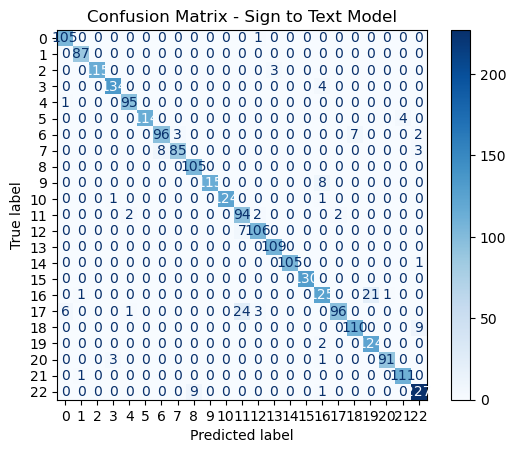

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Sign to Text Model")
plt.show()


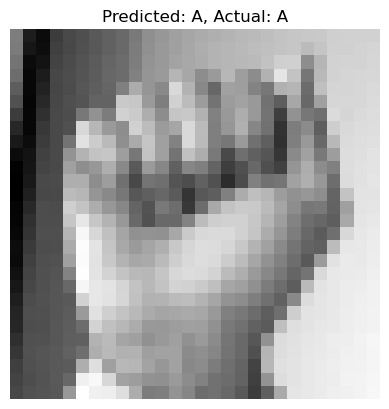

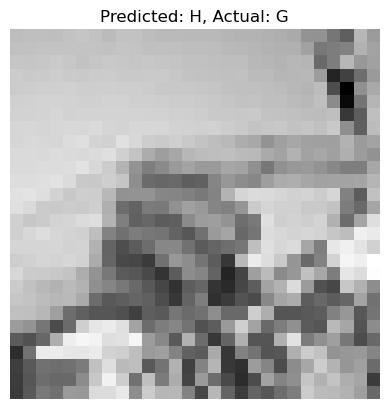

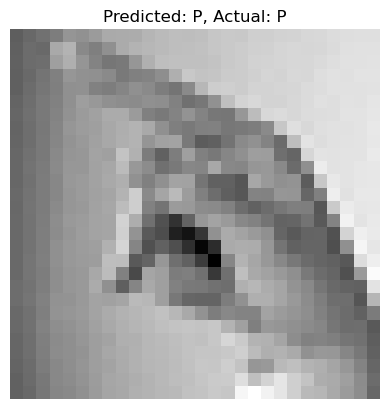

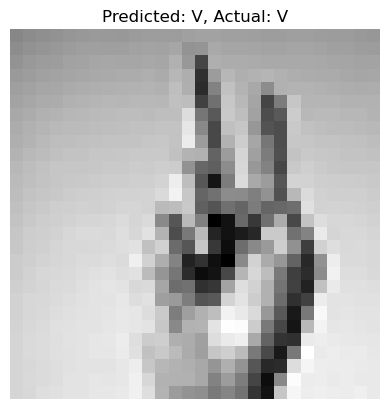

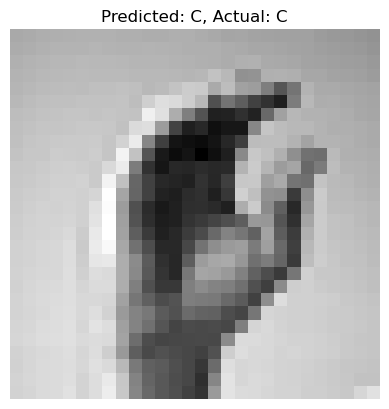

In [69]:
import random

indices = random.sample(range(len(X_test)), 5)

for i in indices:
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {chr(y_pred[i]+65)}, Actual: {chr(y_true[i]+65)}")
    plt.axis('off')
    plt.show()


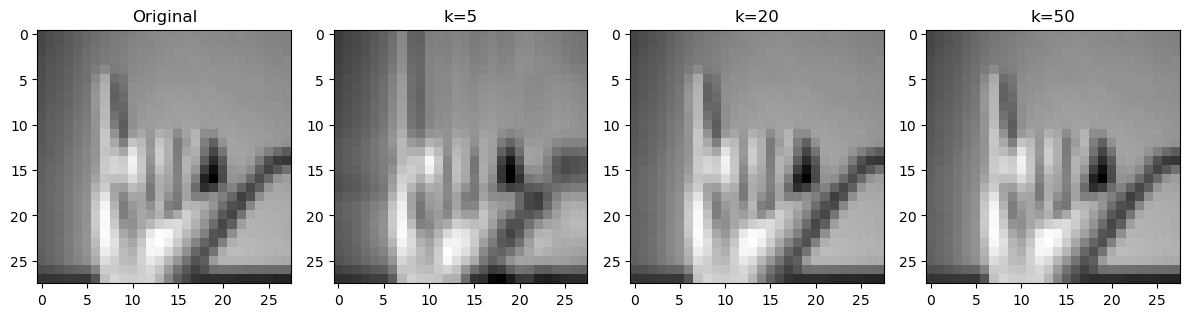

In [70]:
img = X[0].reshape(28, 28)

U, S, Vt = np.linalg.svd(img, full_matrices=False)

ks = [5, 20, 50]
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original")

for i, k in enumerate(ks):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    compressed = np.dot(U_k, np.dot(S_k, Vt_k))
    axes[i+1].imshow(compressed, cmap='gray')
    axes[i+1].set_title(f"k={k}")

plt.tight_layout()
plt.show()


In [ ]:
print(len(y_true), len(y_pred))
from sklearn.model_selection import train_test_split

X_subset = X[:2128]  
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_optimized, test_size=0.2, random_state=42)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import precision_recall_fscore_support





2746 2746
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/Users/geshnabalaji/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


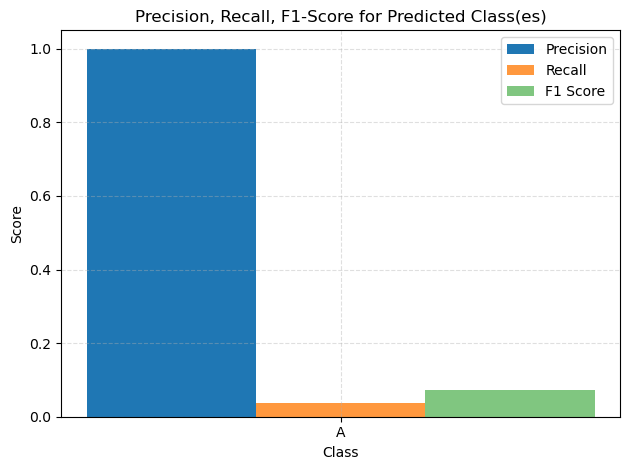

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

if y_pred_classes.ndim > 1:
    y_pred_classes = np.argmax(y_pred_classes, axis=1)

if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_classes)

non_zero_indices = [i for i, (p, r, f) in enumerate(zip(precision, recall, f1)) if (p + r + f) > 0]

filtered_precision = [precision[i] for i in non_zero_indices]
filtered_recall = [recall[i] for i in non_zero_indices]
filtered_f1 = [f1[i] for i in non_zero_indices]
filtered_classes = [chr(i + 65) for i in non_zero_indices]  

x = np.arange(len(filtered_classes))
width = 0.25

plt.bar(x - width, filtered_precision, width=width, label='Precision')
plt.bar(x, filtered_recall, width=width, label='Recall', alpha=0.8)
plt.bar(x + width, filtered_f1, width=width, label='F1 Score', alpha=0.6)

plt.xticks(x, filtered_classes)
plt.xlabel("Class")
plt.ylabel("Score")
plt.title("Precision, Recall, F1-Score for Predicted Class(es)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


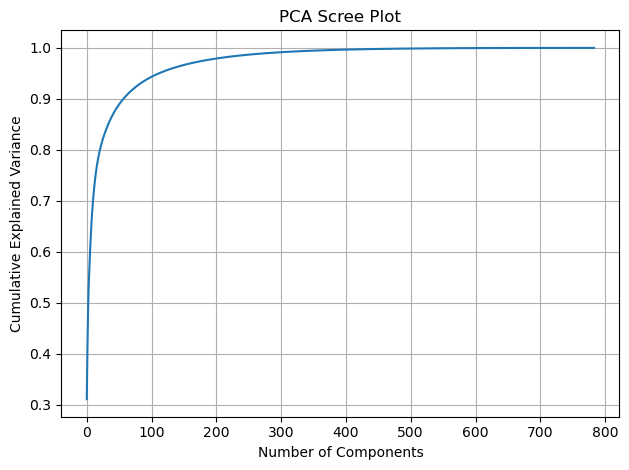

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

X_flattened = X.reshape(X.shape[0], -1) 

pca = PCA().fit(X_flattened)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


# Text to sign


sample_idx = 0
plt.plot(np.abs(fft(y[sample_idx])), label='Original FFT')
plt.plot(np.abs(y_optimized[sample_idx]), label='After ADMM', linestyle='--')
plt.title("FFT before and after ADMM Optimization")
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.initializers import Orthogonal
from tensorflow.keras.losses import MeanSquaredError

def mse(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

custom_objects = {
    "mse": mse,
    "Orthogonal": Orthogonal(),  
}

with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model("text_to_sign_model.h5")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

df = pd.read_csv("/Users/geshnabalaji/Desktop/My File/robMath/final_roboMath/sign_mnist_train_small.csv")

X = df.drop(columns=['label']).values / 255.0
y = df['label'].values
y[y >= 24] = 23 

X = X.reshape(-1, 28, 28, 1)

def svd_compress_images(images, k=20):
    compressed_images = []
    for img in images:
        img = img.squeeze() 
        U, S, Vt = np.linalg.svd(img, full_matrices=False)
        S_k = np.diag(S[:k])
        U_k = U[:, :k]
        Vt_k = Vt[:k, :]
        img_compressed = np.dot(U_k, np.dot(S_k, Vt_k))
        compressed_images.append(img_compressed)
    return np.array(compressed_images).reshape(-1, 28, 28, 1)

X = svd_compress_images(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = to_categorical(y_test, num_classes=24)


In [ ]:
import json
import numpy as np
from scipy.fft import fft
from scipy.optimize import minimize

with open("/Users/geshnabalaji/Desktop/My File/robMath/final_roboMath/hand_keypoints.json", "r") as f:
    text_to_keypoints = json.load(f)

word_list = list(text_to_keypoints.keys())
word_to_idx = {word: i for i, word in enumerate(word_list)}
idx_to_word = {i: word for word, i in word_to_idx.items()}

X = np.array([word_to_idx[word] for word in text_to_keypoints.keys()])
y = np.array([np.mean(text_to_keypoints[word], axis=0) for word in text_to_keypoints.keys()])

y_fft = np.array([np.abs(fft(pts)) for pts in y])

def admm_optimize(y_fft):
    def loss_fn(params_flat):
        params = params_flat.reshape(y_fft.shape)
        return np.sum((params - y_fft) ** 2)
    
    initial_params = np.random.randn(y_fft.size)
    result = minimize(loss_fn, initial_params, method="L-BFGS-B")
    return result.x.reshape(y_fft.shape)

y_optimized = admm_optimize(y_fft)

X = X.reshape(-1, 1)


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = X.astype(np.int32)

y_pred = model.predict(X)

mae = mean_absolute_error(y_optimized, y_pred)
mse = mean_squared_error(y_optimized, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

def compute_accuracy(y_true, y_pred, tolerance=5):
    distances = np.linalg.norm(y_true - y_pred, axis=1)
    return np.mean(distances <= tolerance) * 100

accuracy = compute_accuracy(y_optimized, y_pred)
print(f"Custom Accuracy (within tolerance): {accuracy:.2f}%")


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
MAE: 0.5759
MSE: 0.5277
RMSE: 0.7264
Custom Accuracy (within tolerance): 72.27%


/Users/geshnabalaji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


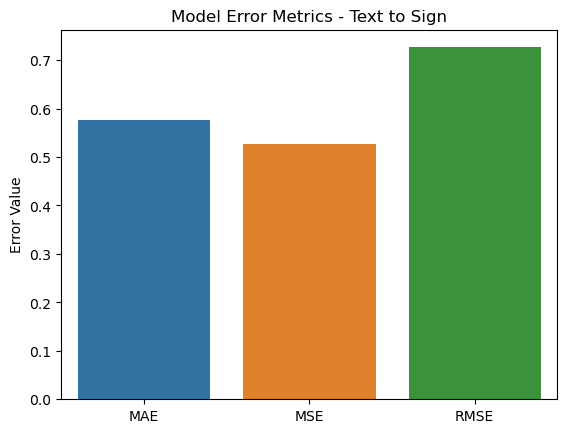

In [25]:
import seaborn as sns

errors = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse
}

sns.barplot(x=list(errors.keys()), y=list(errors.values()))
plt.title("Model Error Metrics - Text to Sign")
plt.ylabel("Error Value")
plt.show()


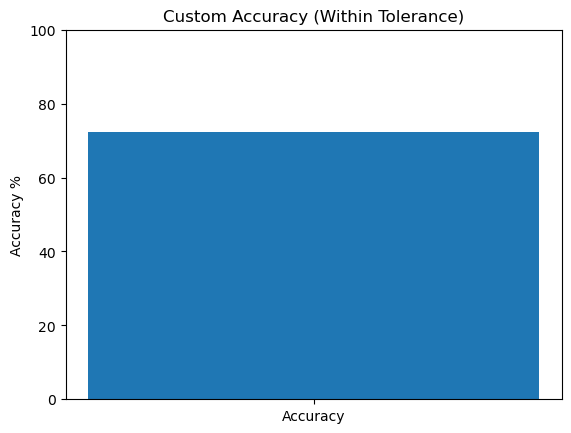

In [26]:
plt.bar(['Accuracy'], [accuracy])
plt.title("Custom Accuracy (Within Tolerance)")
plt.ylim(0, 100)
plt.ylabel("Accuracy %")
plt.show()
